<a href="https://colab.research.google.com/github/borbysh/Momentum-QNG/blob/main/Quantum_Machine_Learning/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pennylane
#!pip install ipyparallel

In [2]:
import pennylane as qml
from pennylane import numpy as np

In [25]:
def show(caption, OptimazerClass, date):
    if isinstance(caption, tuple):
        costs_mean = None
        costs_stdev = None
        llrs = None
        for cap in caption:
            prefix = f"{cap}_{OptimazerClass.__name__}_{date}"
            [costs_mean_,costs_stdev_] = np.load(f"{prefix}_moments.npy", allow_pickle=True)
            llrs_ = np.load(f"{prefix}_lrs.npy")
            (Nlr_,Niter) = np.array(costs_mean_).shape
            if llrs is None:
                llrs = llrs_
                costs_mean = costs_mean_
                costs_stdev = costs_stdev_
            else:
                llrs = np.concatenate((llrs, llrs_), axis=0)
                costs_mean = np.concatenate((costs_mean, costs_mean_), axis=0)
                costs_stdev = np.concatenate((costs_stdev, costs_stdev_), axis=0)
            
        print(costs_mean.shape,llrs_.shape)
        print(llrs)


In [26]:
show(("ae1_1","ae1_2"),qml.MomentumQNGOptimizer,"2025.09.24")

(4, 50) (2,)
[0.001      0.00215443 0.00464159 0.01      ]


In [34]:
import matplotlib.pyplot as plt

def show(caption, OptimazerClass, date):
    if isinstance(caption, tuple):
        costs_mean = None
        costs_stdev = None
        llrs = None
        for cap in caption:
            prefix = f"{cap}_{OptimazerClass.__name__}_{date}"
            [costs_mean_,costs_stdev_] = np.load(f"{prefix}_moments.npy", allow_pickle=True)
            llrs_ = np.load(f"{prefix}_lrs.npy")
            (Nlr_,Niter) = np.array(costs_mean_).shape
            if llrs is None:
                llrs = llrs_
                costs_mean = costs_mean_
                costs_stdev = costs_stdev_
            else:
                llrs = np.concatenate((llrs, llrs_), axis=0)
                costs_mean = np.concatenate((costs_mean, costs_mean_), axis=0)
                costs_stdev = np.concatenate((costs_stdev, costs_stdev_), axis=0)
    else:
        prefix = f"{caption}_{OptimazerClass.__name__}_{date}"
        [costs_mean,costs_stdev] = np.load(f"{prefix}_moments.npy", allow_pickle=True)
        llrs = np.load(f"{prefix}_lrs.npy")
        (Nlr,Niter) = np.array(costs_mean).shape
    
    fig, ax = plt.subplots(figsize=(8, 5))
    iters = np.linspace(1,Niter,Niter)
    for index,lr in enumerate(llrs):
        arr_y = costs_mean[index]
        arr_y_plus_err  = [costs_mean[index][i] - costs_stdev[index][i] for i in range(Niter)]
        arr_y_minus_err = [costs_mean[index][i] + costs_stdev[index][i] for i in range(Niter)]
        ax.plot(iters, arr_y, label=f"lr = {lr:.5f}")
        ax.fill_between(iters, arr_y_minus_err, arr_y_plus_err, alpha=0.1)
    
    ax.set_title(f"Autoencoder #1: Costs for {OptimazerClass.__name__}")
    #ax.set_xlim(0, max(xpos)); ax.set_ylim(-1, 1)
    ax.set_xlabel("Iteration");
    ax.set_ylabel("Cost");
    ax.legend()
    ax.grid()
    plt.yscale('log')
    fig.tight_layout()
    
    plt.savefig(f"ae1_{OptimazerClass.__name__}.png", dpi=300, bbox_inches='tight')
    plt.show() 


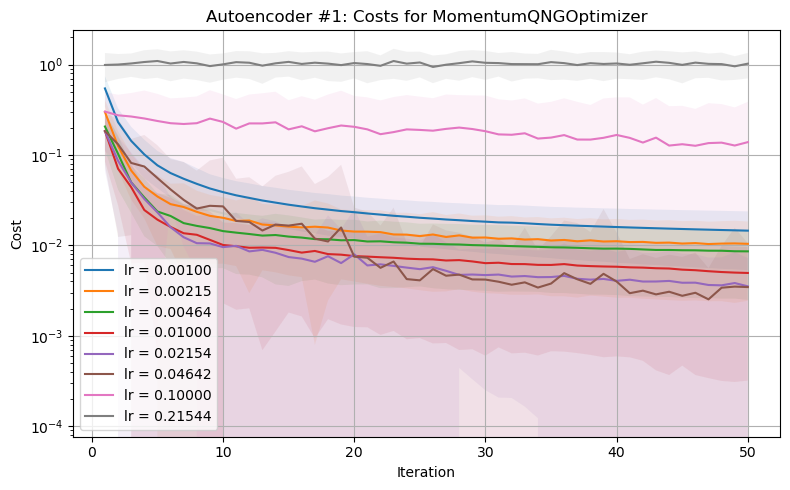

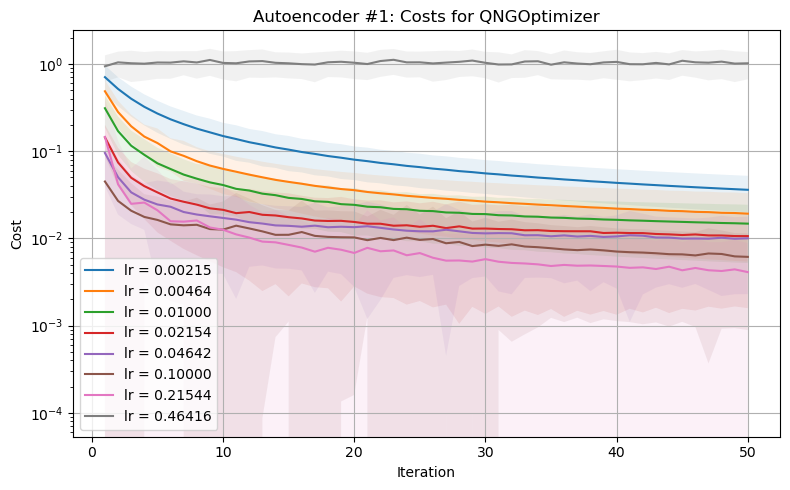

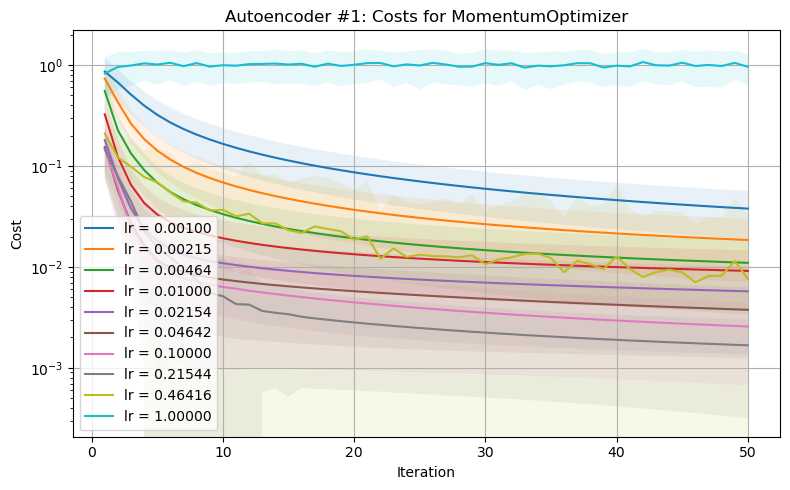

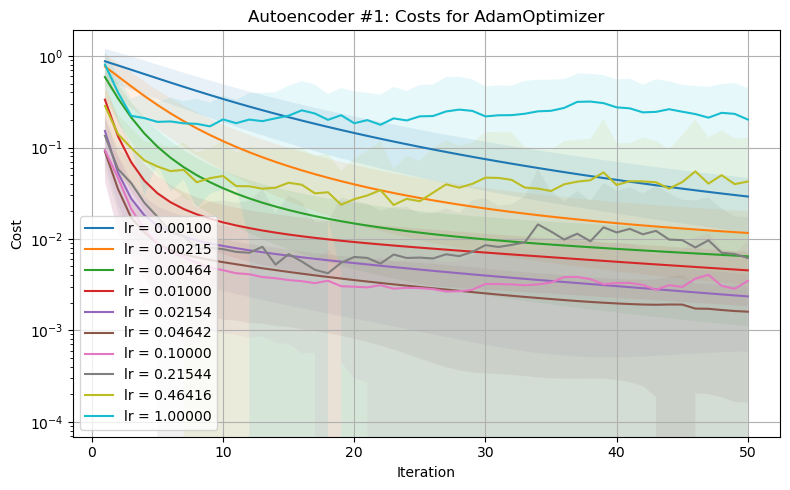

In [35]:
show(("ae1_1","ae1_2","ae1_3","ae1_4"),qml.MomentumQNGOptimizer,"2025.09.24")
show(("ae1_1","ae1_2","ae1_3","ae1_4"),qml.QNGOptimizer,"2025.09.24")
show("ae1",qml.MomentumOptimizer,"2025.09.24")
show("ae1",qml.AdamOptimizer,"2025.09.24")